In [1]:
import os
import IPython
import IPython.display
import matplotlib as plt
#import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
folder=os.getcwd()+"/Data/wave_stats"
significant_wave_height=np.empty(0)
max_wave_height=np.empty(0)
wave_peak_period=np.empty(0)
water_depth=np.empty(0)
for file in os.listdir(folder):
        if file.endswith(".npz"):
            data=np.load(folder+"/"+file)
            significant_wave_height=np.append(significant_wave_height,data['significant_wave_height'])
            max_wave_height=np.append(max_wave_height,data['max_wave_height'])
            #print(data['wave_peak_period'])
            wave_peak_period=np.append(wave_peak_period,data['wave_peak_period'])
            water_depth=np.append(water_depth,data['wave_depth'])
            if len(data['max_wave_height'])>0:
                if max(data['max_wave_height'])>30:
                    print(np.argwhere(data['max_wave_height']>30))    
            print("Processing: " + file)
            

Processing: 028p1_d01.npz
Processing: 028p1_d02.npz
Processing: 028p1_d03.npz
Processing: 028p1_d04.npz
Processing: 028p1_d05.npz
Processing: 028p1_d06.npz
Processing: 028p1_d07.npz
Processing: 028p1_d08.npz
Processing: 028p1_d09.npz
Processing: 028p1_d10.npz
Processing: 028p1_d11.npz
Processing: 028p1_d12.npz
Processing: 028p1_d13.npz
Processing: 028p1_d14.npz
Processing: 028p1_d15.npz
Processing: 028p1_d16.npz
Processing: 028p1_d17.npz
Processing: 028p1_d18.npz
Processing: 028p1_d19.npz
Processing: 028p1_d20.npz
Processing: 028p1_d21.npz
Processing: 028p1_d22.npz
Processing: 029p1_d01.npz
[[1677]]
Processing: 029p1_d02.npz
Processing: 029p1_d03.npz
Processing: 029p1_d04.npz
Processing: 029p1_d05.npz
Processing: 029p1_d06.npz
Processing: 029p1_d07.npz
Processing: 029p1_d08.npz
Processing: 029p1_d09.npz
Processing: 029p1_d10.npz
Processing: 029p1_d11.npz
Processing: 029p1_d12.npz
Processing: 029p1_d13.npz
Processing: 029p1_d14.npz
Processing: 029p1_d15.npz
Processing: 029p1_d16.npz
Pro

In [3]:
len(max_wave_height)

14736027

In [4]:
max(max_wave_height)

39.10000038146973

C:\Users\thomasbr\Miniconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


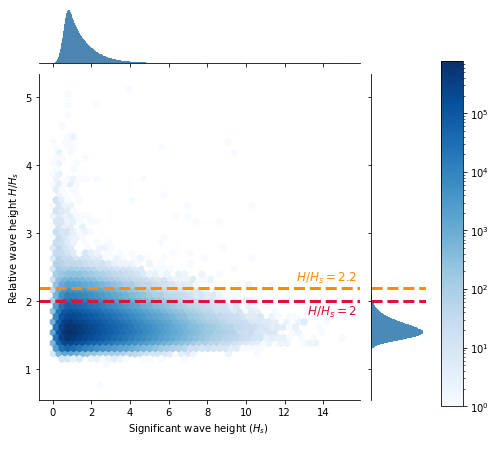

In [12]:
x1 = significant_wave_height
x2 = max_wave_height/significant_wave_height
 
h=sns.jointplot(x1, x2, kind='hex',cmap="Blues", bins='log')#,,bins='log', fill=True, kind='kde',

h.ax_joint.set_xlabel("Significant wave height ($H_s$) \n")
h.ax_joint.set_ylabel("Relative wave height $H/H_s$")

for ax in (h.ax_joint, h.ax_marg_y):
    ax.axhline(2, color='crimson', ls='--', lw=3)
    ax.axhline(2.2, color='darkorange', ls='--', lw=3)
    
h.fig.text(0.7, 0.26,'$H/H_s=2$',fontsize=12,fontweight='bold',color='crimson')
h.fig.text(0.675, 0.34,'$H/H_s=2.2$',fontsize=12,fontweight='bold',color='darkorange')

#plt.pyplot.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)

cbar_ax = h.fig.add_axes([1.01, .05, .05, .8])  # x, y, width, height
plt.pyplot.colorbar(cax=cbar_ax)
 

filename=os.getcwd()+'/wave_stats_Hs_vs_H_rel.jpg'
plt.pyplot.savefig(filename,dpi=699, bbox_inches = "tight")#, format='pdf',bbox_inches='tight')    
plt.pyplot.show()

In [14]:
N_A=len(np.where(x2>2.2)[0])
N_B=len(np.where(x2>2 )[0])
print('Percentage Definition A: ' + str(np.round(N_A/len(x2)*100,2))+ '% total: '+ str(N_A))
print('Percentage Definition B: ' + str(np.round(N_B/len(x2)*100,2))+ '% total: '+ str(N_B))


Percentage Definition A: 0.14% total: 20038
Percentage Definition B: 1.23% total: 181932


In [15]:
alpha=(2*np.pi/wave_peak_period)**2/9.81*water_depth
alpha=alpha[alpha != 0]
beta=alpha*np.sqrt(1/np.tanh(alpha))
kpd=beta
kpd_test=(alpha+beta**2*(1/np.cosh(beta))**2)/(np.tanh(beta)+beta*(1/np.cosh(beta))**2)


C:\Users\thomasbr\AppData\Local\Temp\ipykernel_10080\1700533659.py:5: RuntimeWarning: overflow encountered in cosh
  kpd_test=(alpha+beta**2*(1/np.cosh(beta))**2)/(np.tanh(beta)+beta*(1/np.cosh(beta))**2)


In [16]:
print(np.max(kpd_test-kpd))


0.053871409858580854


C:\Users\thomasbr\Miniconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


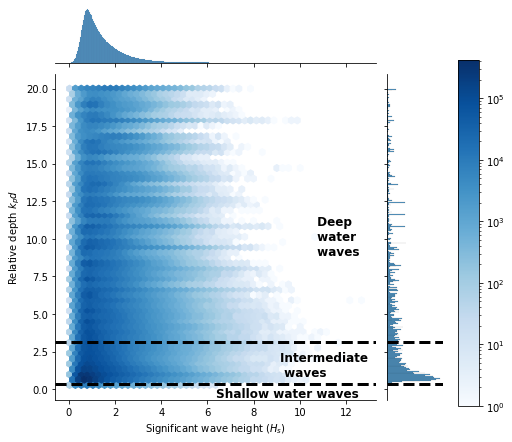

In [17]:
x1 = significant_wave_height[water_depth!=0]
x2 = kpd[kpd<20]
x1 = x1[kpd<20]

h=sns.jointplot(x1, x2, kind='hex',cmap="Blues",bins='log')#,,bins='log', fill=True, kind='kde',, bins='log',joint_kws=dict(gridsize=100)

for ax in (h.ax_joint, h.ax_marg_y):
    ax.axhline(np.pi/10, color='black', ls='--', lw=3)
    ax.axhline(np.pi, color='black', ls='--', lw=3)
    
h.fig.text(0.45, 0.07,'Shallow water waves' ,fontsize=12,fontweight='bold',color='black')
h.fig.text(0.6, 0.12,'Intermediate \n waves',fontsize=12,fontweight='bold',color='black')
h.fig.text(0.675, 0.4,' Deep \n water \n waves',fontsize=12,fontweight='bold',color='black')


h.ax_joint.set_xlabel("Significant wave height ($H_s$)")
h.ax_joint.set_ylabel("Relative depth $k_p d$")

cbar_ax = h.fig.add_axes([1.01, .05, .05, .8])  # x, y, width, height
plt.pyplot.colorbar(cax=cbar_ax)

filename=os.getcwd()+'/wave_stats_Hs_vs_kpd.jpg'
plt.pyplot.savefig(filename,dpi=699, bbox_inches = "tight")#, format='pdf',bbox_inches='tight') 

plt.pyplot.show()

In [18]:
N_shallow=len(np.where(x2<np.pi/10)[0])
N_inter=len(np.where((x2>np.pi/10) &  (x2<np.pi))[0])
N_deep=len(np.where(x2>np.pi)[0])
print('Percentage deep water: ' + str(np.round(N_deep/len(x2)*100,2))+ '% total: '+ str(N_deep))
print('Percentage intermediate water: ' + str(np.round(N_inter/len(x2)*100,2))+ '% total: '+ str(N_inter))
print('Percentage shallow water: ' + str(np.round(N_shallow/len(x2)*100,2))+ '% total: '+ str(N_shallow))

Percentage deep water: 54.49% total: 6972501
Percentage intermediate water: 45.51% total: 5824095
Percentage shallow water: 0.0% total: 175
